## Notes
- https://github.com/alirezadir/Machine-Learning-Interviews/blob/main/src/MLC/notebooks/logistic_regression.ipynb

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [19]:
class LogisticRegression:

    def sigmod(self, z):
        return 1/(1 + np.exp(-z))
    
    def __init__(self, learning_rate = 0.01, reg = 0.001, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.bias = None
        self.weights = None
        self.reg = reg
    
    def fit(self, X_data, y_labels):
        n_samples, n_features = X_data.shape
        self.bias = 0
        self.weights = np.random.randn(n_features)
        
        for iteration in range(self.num_iterations):
            logit = np.dot(X_data, self.weights)  + self.bias
            prob = self.sigmod(logit)
            loss = - 1/n_samples * np.sum(((y_labels)* np.log(prob) + (1-y_labels) * np.log(1 - prob)))
            # import pdb; pdb.set_trace()
            loss_reg = self.reg * 0.5 * np.sum(np.dot(self.weights, self.weights))
            loss += loss_reg
            
            dloss = 1/n_samples * (prob - y_labels)
            dw = np.dot(X_data.T, dloss) + self.reg * self.weights # 1000 * 2 * 1000
            db = np.sum(dloss)
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db
            if iteration % 100 == 0:
                print (iteration, loss)
    def predict(self, X_data):
        dpredict =  (np.dot(X_data , self.weights) + self.bias)
        prob = self.sigmod(dpredict)
        return np.round(prob).astype(int)


## 1. Test Data

In [20]:
            
N, D = 1000, 2 

X_data = np.random.randn(N, D)
y_labels = np.random.randint(0, D, (N, ))

lr = LogisticRegression(num_iterations=1000)
lr.fit(X_data, y_labels)

y_predicted = lr.predict(X_data)
print ("accurays", 1/len(y_labels) * 1.0 * (np.sum(y_predicted == y_labels)))

0 0.7225173659672097
100 0.710659291268534
200 0.7031022824403423
300 0.698381040499623
400 0.695470824564717
500 0.6936926289272112
600 0.6926121845236098
700 0.6919579889227784
800 0.691562724228712
900 0.6913242035000032
accurays 0.52


## 2. Improvements

-  Can use mini-batch gradient descent 
- Add L1, L2 reg

## 3. Visualize

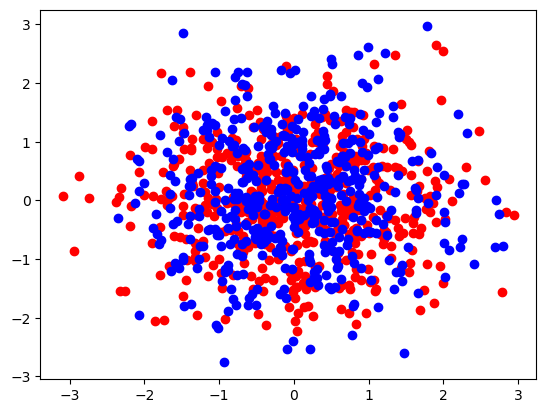

In [21]:
colors = ['r', 'b']
for label in [0, 1]:
    plt.scatter(
        X_data[y_labels==label][:, 0],
        X_data[y_labels==label][:, 1],
        color=colors[label]
    )
plt.show()    